https://zenn.dev/murakamixi/articles/9b7f63f6eb79ad


In [2]:
from pycaret.datasets import get_data
boston_data = get_data('boston')

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [7]:
boston_data.shape

(506, 14)

In [3]:
import pandas as pd

In [4]:
from pycaret.regression import *
exp1 = setup(boston_data, target = 'medv')

In [6]:
compare_models()

In [8]:
rf = create_model('rf')

In [10]:
tuned_rf = tune_model(rf)

In [9]:
tuned_rf = tune_model(rf,n_iter = 100, optimize = 'r2')

IntProgress(value=0, description='Processing: ', max=7)

Initiated  . . . . . . . . . . . . . . . . . .                 03:55:52
Status     . . . . . . . . . . . . . . . . . .         Finalizing Model
Estimator  . . . . . . . . . . . . . . . . . .  Random Forest Regressor

Empty DataFrame
Columns: [MAE, MSE, RMSE, R2, RMSLE, MAPE]
Index: []

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.2s
/Users/kouki/opt/anaconda3/envs/pycaret/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kouki/opt/anaconda3/envs/pycaret/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kouki/opt/anaconda3/envs/pycaret/lib/python3.9/site-packages/pycaret/internal/pipeline.py", line 120, in fit
    self._carry_over_final_estimator_fit_vars()
  File "/Users/kouki/opt/anaconda3/envs/pycaret/lib/python3.9/site-packages/pycaret/internal/pipeline.py", line 57, in _carry_over_final_estimator_fit_vars


KeyboardInterrupt: 

In [11]:
tuned_rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.005,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=130, n_jobs=-1, oob_score=False,
                      random_state=1883, verbose=0, warm_start=False)>

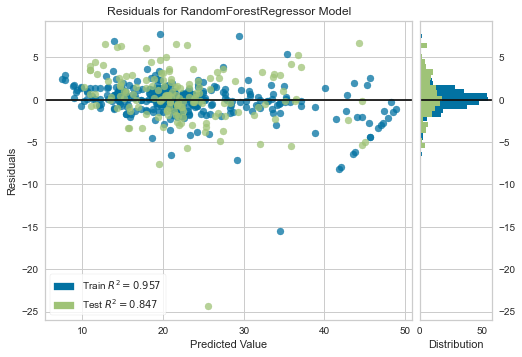

In [12]:
plot_model(tuned_rf)

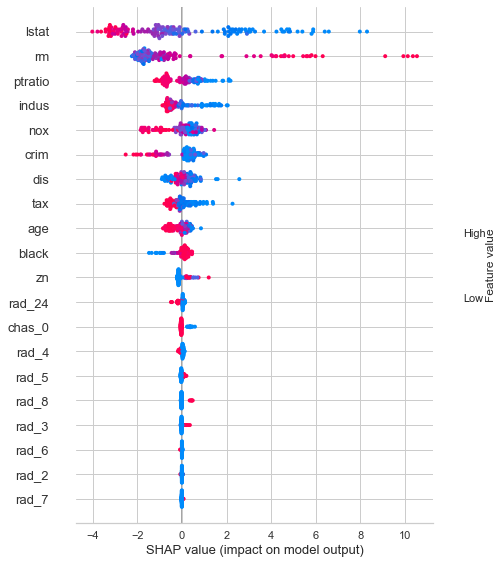

In [13]:
interpret_model(tuned_rf)

In [14]:
rf_holdout_pred = predict_model(rf)

In [15]:
predictions = predict_model(rf, data=boston_data)

In [16]:
predictions

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv      Label  
0       15.3  396.90   4.98  24.0  25.673000  
1       17.8  396.90   9.14  21.6  21.793000  
2       17.8  392.83   4.03  34.7  34.550001  
3       18.7  394.63   2.94  33.4  33.529001  
4       18.7  396.90   5.33  36.2  33.748001  
..       ...     ...    ...   ...        ...  
501     21.0  391.99   9.67  22.4  23.532000  
502     21.0  396.90   9.08  20.6  19.861000  
503     21.0  396.90   5.64  23.9  27.896000  
504     21.0  393.45   6.48  22.0  24.887000  
505     21.0  396.90   7.88  11.9  15.057000  

[506 rows x 15 columns]